### Problem 01 - Forest Fire
classify the Size_Categorie using SVM

#### 1. Importing the Libraries

In [90]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold,cross_val_score, LeaveOneOut
from IPython.display import Image
from IPython.core.display import HTML
from matplotlib.colors import ListedColormap

####  2. Importing the Data

In [3]:
data_1 = pd.read_csv('FORESTFIRES.csv')
data_1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


####  3. Data Understanding

In [4]:
data_1.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [5]:
data_1.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
data_1.shape

(517, 31)

In [7]:
data_1.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data_1['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [9]:
378/139

2.7194244604316546

In [10]:
# from above there only 2 class for forrest fire classification and class small have highest frequency compare to class large.
## data is imbalanced in approx 3 : 1 ratio
### description for classes are given.

#### 4. Data Preparation

In [11]:
# since SVM method is based on euclideon distance method all categorical data should be encoded
# data is one hot encoded for month and week day data in original data set, dropping month and day of week column.

In [12]:
data_2 = data_1.drop(labels=['month','day'], axis=1)
data_2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [13]:
corr_2 = data_2.corr()

<AxesSubplot:>

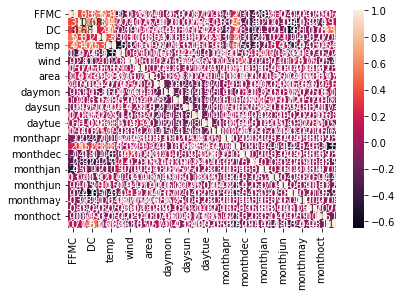

In [14]:
sns.heatmap(corr_2, annot = True)

In [15]:
data_2['size_category']

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [16]:
data_2['size_category'] = data_2['size_category'].replace('small',1)

In [17]:
data_2['size_category'] = data_2['size_category'].replace('large',0)

In [18]:
data_2['size_category']

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [24]:
X_unscaled = data_2.drop(labels = ['size_category'], axis = 1)
y = data_2[['size_category']]

In [31]:
X_unscaled_new = X_unscaled.iloc[:,0:8]
X_unscaled_new

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [25]:
mm_scale = MinMaxScaler()

In [34]:
mm_scale = mm_scale.fit_transform(X_unscaled_new)

In [35]:
X_scaled_new = pd.DataFrame(data = mm_scale,columns=X_unscaled_new.columns)
X_scaled_new

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000
...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000


In [47]:
X_unscaled.shape

(517, 28)

In [48]:
X_temp = X_unscaled.iloc[:,8:28]
X_temp

,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
513,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
514,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
515,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [53]:
X = pd.concat([X_scaled_new, X_temp] , axis= 1)
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [55]:
y.head()

,size_category
0,1
1,1
2,1
3,1
4,1


In [56]:
X.shape , y.shape

((517, 28), (517, 1))

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

In [58]:
X_train.shape, X_test.shape , y_train.shape , y_test.shape

((413, 28), (104, 28), (413, 1), (104, 1))

#### 5.Model Building

In [59]:
#data is imbalance in 3:1 ratio thus class weights are applied in 1:3 ratio

In [60]:
model_lin = SVC(kernel='linear', class_weight={1:1,0:3}) 
model_poly = SVC(kernel='poly', class_weight={1:1,0:3})
model_rbf = SVC(kernel='rbf', class_weight={1:1,0:3})
model_sigmoid = SVC(kernel='sigmoid', class_weight={1:1,0:3})

#### 6. Model Training | 7. Model Testing

In [61]:
model_lin.fit(X_train, y_train)

SVC(class_weight={0: 3, 1: 1}, kernel='linear')

In [62]:
model_poly.fit(X_train, y_train)

SVC(class_weight={0: 3, 1: 1}, kernel='poly')

In [63]:
model_rbf.fit(X_train, y_train)

SVC(class_weight={0: 3, 1: 1})

In [64]:
model_sigmoid.fit(X_train, y_train)

SVC(class_weight={0: 3, 1: 1}, kernel='sigmoid')

In [65]:
lin_y_pred_train = model_lin.predict(X_train)

In [66]:
poly_y_pred_train = model_poly.predict(X_train)

In [67]:
rbf_y_pred_train = model_rbf.predict(X_train)

In [68]:
sigmoid_y_pred_train = model_sigmoid.predict(X_train)

In [69]:
lin_y_pred_test = model_lin.predict(X_test)

In [70]:
poly_y_pred_test = model_poly.predict(X_test)

In [71]:
rbf_y_pred_test = model_rbf.predict(X_test)

In [72]:
sigmoid_y_pred_test = model_sigmoid.predict(X_test)

#### 8. Model Evaluation

In [73]:
# linear

In [74]:
print(accuracy_score(y_train, lin_y_pred_train))
print(accuracy_score(y_test, lin_y_pred_test))

0.9975786924939467
1.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x222324ed880>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2223482bb20>)

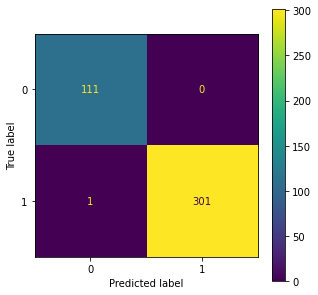

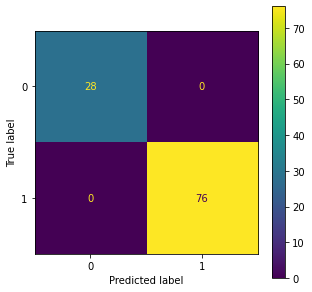

In [75]:
fig, ax = plt.subplots(figsize=(5, 5))
fig, bx = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(model_lin,X_train,y_train, ax = ax), plot_confusion_matrix(model_lin,X_test,y_test, ax = bx)

In [76]:
# poly

In [77]:
print(accuracy_score(y_train, poly_y_pred_train))
print(accuracy_score(y_test, poly_y_pred_test))

0.8038740920096852
0.7692307692307693


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2223322c0a0>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x222347abeb0>)

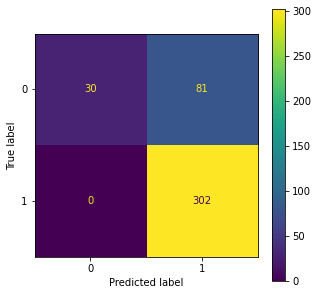

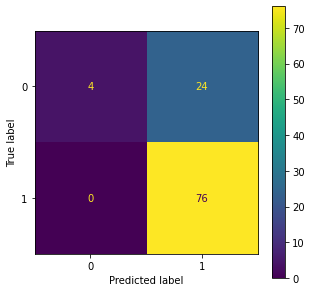

In [78]:
fig, ax = plt.subplots(figsize=(5, 5))
fig, bx = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(model_poly,X_train,y_train, ax =ax), plot_confusion_matrix(model_poly,X_test,y_test, ax =bx)

In [79]:
# rbf

In [80]:
print(accuracy_score(y_train, rbf_y_pred_train))
print(accuracy_score(y_test, rbf_y_pred_test))

0.9903147699757869
0.9711538461538461


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x22233142190>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x22233155e20>)

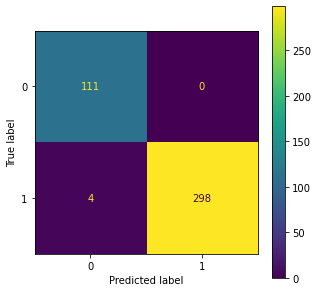

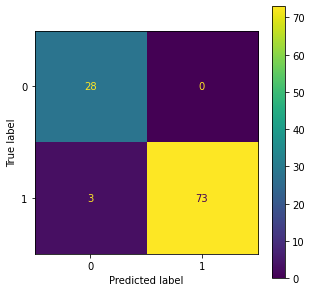

In [81]:
fig, ax = plt.subplots(figsize=(5, 5))
fig, bx = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(model_rbf,X_train,y_train, ax =ax), plot_confusion_matrix(model_rbf,X_test,y_test, ax =bx)

In [82]:
# sigmoid

In [83]:
print(accuracy_score(y_train, sigmoid_y_pred_train))
print(accuracy_score(y_test, sigmoid_y_pred_test))

0.9927360774818402
0.9903846153846154


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2223452ac10>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2223459a850>)

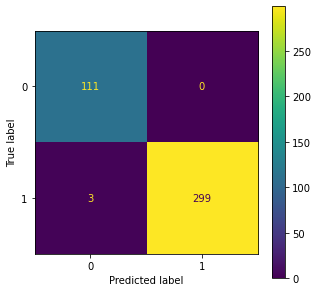

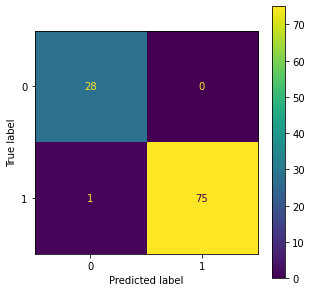

In [84]:
fig, ax = plt.subplots(figsize=(5, 5))
fig, bx = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(model_sigmoid,X_train,y_train, ax =ax), plot_confusion_matrix(model_sigmoid,X_test,y_test, ax =bx)

#### 9. Output Evaluation

In [86]:
# from above we can observe that accuracy for linear model is highest for both training and test data

## also for test data set in linear model flase negative classification is 0.
##false negative means large fires are classified as small fire which can be consider as more hazardous.

### if rbf or poly model were selected there performance can be improved With Grid Search CV,
### by tweaking gamma and c value